# FoML  Assignment-4
## Naitik Malav | CS19BTECH11026
## 5th

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

### Importing training and test dataset from attached csv files (train.csv, test.csv)

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
X_train = train_df.iloc[:, :-1]
Y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
Y_test = test_df.iloc[:, -1]

In [4]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

### Transpose of each dataset

In [5]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])

### 5th (a) 
### Logistic Regression Classifier trained using gradient descent and cross-entropy error(as the error function):

### Sigmoid Function:

In [6]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

### Cost Function / Cross-Entropy error function

In [7]:
def get_cost(m, Y, a):
    return -(1/m)*np.sum(Y*np.log(a) + (1-Y)*np.log(1-a))

In [8]:
def clf(X, Y, learningRate, iterations, W, B):
    m, n = X_train.shape[1], X_train.shape[0]
    
    weights = W
    base = B
    
    for i in range(iterations):
        
        z = np.dot(weights.T, X) + base
        a = sigmoid(z)
        cost = get_cost(m, Y, a)
        
        dWeights = (1/m)*np.dot(a-Y, X.T)
        dBase = (1/m)*np.sum(a-Y)
        weights -= learning_rate*dWeights.T
        base -= learning_rate*dBase
        
        costs.append(cost)
        
        if(i%(iterations/10) == 1):
            print(f"Cost after {i} iterations is: {cost}")
    
    return weights, base

In [9]:
iterations = 100000
learning_rate = 0.01
Weights = np.zeros((X_train.shape[0], 1))
Bias = 0
costs = []
Weights, Bias = clf(X_train, Y_train, learning_rate, iterations, Weights, Bias)
print(Weights, Bias)

Cost after 1 iterations is: 0.6930505532508043
Cost after 10001 iterations is: 0.35214686672757545
Cost after 20001 iterations is: 0.2323229709437589
Cost after 30001 iterations is: 0.1736039027322533
Cost after 40001 iterations is: 0.13887456663575598
Cost after 50001 iterations is: 0.11589771056577576
Cost after 60001 iterations is: 0.09954500104105682
Cost after 70001 iterations is: 0.0872970040762255
Cost after 80001 iterations is: 0.07777130144062172
Cost after 90001 iterations is: 0.07014548494516984
[[15.9651542 ]
 [ 4.32949164]] -11.175304777542943


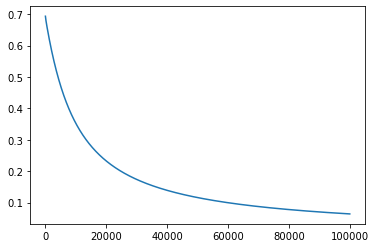

In [10]:
plt.plot(costs)

## 5th (b)

### (i) Here Weights = [[theta1], [theta2]] = [[1.5], [0.5]] and Bias = theta0 = -1 and learning rate = 0.1

In [11]:
Weights = np.array([[1.5], [0.5]])
Bias = -1

learning_rate = 0.1
iterations = 100000 #sample iterations set to be 100000
costs = []

#clf will update the new weights and bias.
Weights, Bias = clf(X_train, Y_train, learning_rate, iterations, Weights, Bias)
print(Weights)
print(Bias)

Cost after 1 iterations is: 0.5565250322222675
Cost after 10001 iterations is: 0.06242069275259844
Cost after 20001 iterations is: 0.03354464004530305
Cost after 30001 iterations is: 0.023001781106332973
Cost after 40001 iterations is: 0.017520807317677363
Cost after 50001 iterations is: 0.01415743325113888
Cost after 60001 iterations is: 0.011881544861452925
Cost after 70001 iterations is: 0.010238423119169103
Cost after 80001 iterations is: 0.0089960356691871
Cost after 90001 iterations is: 0.008023523504658413
[[31.36347263]
 [ 7.53262099]]
-21.19055157257816


### (ii) Using gradient descent to update θ0, θ1, θ2 for one iteration.

In [12]:
Weights = np.array([[1.5], [0.5]])
Bias = [-1]

learning_rate = 0.1
iterations = 1
costs = []

W, B = clf(X_train, Y_train, learning_rate, iterations, Weights, Bias)

print("After 1 iteration")
print("New weights are:\n", W)
print("\nNew Bias is:\n", B)

After 1 iteration
New weights are:
 [[1.50535086]
 [0.50196867]]

New Bias is:
 [-1.00316626]


### (iii) Accuracy 

In [13]:
def accuracy(X, Y, Weights, Bias):
    Z = np.dot(Weights.T, X) + Bias
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    
    accuracy = (1-np.sum(np.absolute(A-Y))/Y.shape[1])*100
    print("Accuracy of the model is : ", round(accuracy, 4), "%")
    
    return A

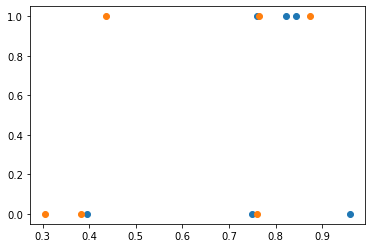

In [14]:
plt.scatter(test_df['x1'],test_df['y'])
plt.scatter(test_df['x2'],test_df['y'])

In [15]:
y_pred = accuracy(X_test, Y_test, W, B)
precision = precision_score(Y_test[0], y_pred[0], average='binary')    
recall = recall_score(Y_test[0], y_pred[0], average='binary')                  
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

Accuracy of the model is :  66.6667 %
Precision: 0.600
Recall: 1.000
